# 感知机模型

## 什么是感知机？

感知机是二分类的线性模型，其输入是实例的特征向量，输出的是事例的类别，分别是+1和-1，属于判别模型。假设训练数据集是线性可分的，感知机学习的目标是求得一个能够将训练数据集正实例点和负实例点完全正确分开的分离超平面。

超平面在2位空间里面就是一条线，在三维空间里面超平面就是一个面。



## 样本点到超平面的距离

$$d = \frac{w * x + b}{|w|}$$



## 感知机的损失函数

M表示的是所有误分类点的集合

$$L(w, b) = - \frac{1}{|w|}\sum_{x_{i}\subset M{i}} y_{i}(w * x_{i} + b)$$


## 感知机的原始形式

输入：训练数据集𝑇=(𝑥1,𝑦1),(𝑥2,𝑦2),...,(𝑥𝑁,𝑦𝑁)，这里的x可能是多个维度，也就是有多列，y为每个数据的标签，并且y必须强制的转化成(-1,1)。原因是便于用来分辨点是否为误分类点。

算法实现：

### Batch GD

1. 初始值 w = 1, b = 1
2. 找出所有的误分类点，假如说某个xi点符合$y_{i}(w * x_{i} + b) <= 0$, 则就是误分类点。然后做下一步操作
3. $$w = w + \lambda \sum_{x_{i}\subset M{i}}y_{i}x_{i}$$
   $$b = b + \lambda \sum_{x_{i}\subset M{i}}y_{i}$$
4. 重复2，3步指导没有误分类点

### BATCH_GD算法实现

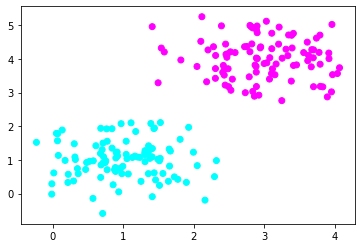

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs

sample_size = 200
centers = [[1,1], [3,4]]
X, Y = make_blobs(n_samples = sample_size, centers = centers, 
                  cluster_std = 0.6, random_state = 11)
Y[Y == 0] = -1

plt.scatter(X[:,0], X[:,1], cmap = 'cool', c = Y)


In [2]:
sum(Y)

0

首先初始化w值和b值，这里是2维的数据，后面可能会遇到多元的情况，所以w可以根据x的维度来取值，且每个维度上的值都取1

In [3]:
x_mat = np.mat(X)
w = np.mat([1] * x_mat.shape[1]).T
b = 0
w

matrix([[1],
        [1]])

现在我们的线是 x + y + 0 = 0, 也就是y = -x, 在这个线上吗看下都多少误分类点

In [4]:
sum(np.ravel(x_mat * w + b) > 0)

199

In [5]:
#np.array([1,2,1]) * np.array([1, -1, 1])

怎么找到这些点。我们可以首先对所有的数据都做操作，将所有的点都算一遍，然后用np.where这样的形式将所有的误分类点给找出来

In [6]:
tmp = np.ravel(x_mat * w + b) * Y
tmp

array([-2.05381758, -1.62106715, -2.22634057, -3.04569713, -1.8032504 ,
        6.81781289, -2.59555701, -1.84925361, -3.01947094, -0.66914739,
       -3.22270718,  8.08683839,  8.49398974,  7.72540234,  6.91191959,
        7.77086607, -2.02147608, -2.57851552,  5.7257503 , -2.56755492,
       -0.9865329 , -1.21203563,  6.22356494,  6.47284884, -2.03284821,
       -1.48123135,  8.15302874, -2.19624193, -2.7963423 ,  6.25233576,
        7.92394652,  6.72799565,  7.86746096, -1.54841204, -1.15994479,
        6.63963034, -0.95231656,  5.50232824,  6.90854088, -2.87802905,
       -2.09158958, -1.72596255, -1.40366361,  6.87018808,  7.96730383,
        5.94924023, -2.48680966,  7.75562277,  6.41069821, -1.9474861 ,
        7.27758153, -2.77740156, -0.79256896,  6.59116192, -1.86327976,
        6.99774428,  7.26845037,  7.11945621, -1.81356511,  7.11206149,
        5.66709456, -0.62818745,  7.21729973,  6.97162592,  5.78367732,
        7.60113976,  7.5610232 , -1.61326864,  8.08845698, -1.47

In [7]:
tmp_result_X = np.array(X[np.where(tmp <= 0)])
tmp_result_Y = Y[np.where(tmp <= 0)]

现在我们已经找到所有的误分类点了，然后就是利用上面的公式

$$w = w + \lambda \sum_{x_{i}\subset M{i}}y_{i}x_{i}$$
$$b = b + \lambda \sum_{x_{i}\subset M{i}}y_{i}$$

In [8]:
tmp_result_X[:3]

array([[1.43936281, 0.61445476],
       [0.71350646, 0.90756069],
       [1.8954829 , 0.33085767]])

In [9]:
tmp_result_Y[:3]

array([-1, -1, -1])

In [11]:
tmp_result_X[:3] * np.array([[1,1], [-1,-1], [1,1]])

array([[ 1.43936281,  0.61445476],
       [-0.71350646, -0.90756069],
       [ 1.8954829 ,  0.33085767]])

In [12]:
#np.array([Y] * x_mat.shape[1]).T

In [13]:
total_w = tmp_result_X * np.array([tmp_result_Y] * x_mat.shape[1]).T
total_w.sum(axis = 0)
tmp_result_Y.sum()

In [16]:
alpha = 0.1

In [17]:
w = w - np.mat(total_w.sum(axis = 0)).T * alpha
b = b - tmp_result_Y.sum() * alpha
w,b

In [20]:
sum(X[:, 1] < 0)

5

In [28]:
x_mat = np.mat(X)
w = np.mat([1] * x_mat.shape[1]).T
b = 0
alpha = 0.01

while True:
    tmp = np.ravel(x_mat * w + b) * Y
    
    missing_TF = tmp<0
    print('missing points are now {}'.format(sum(missing_TF)))
    if sum(missing_TF) == 0:
        break
    finding = np.where(missing_TF)
    
    tmp_result_X = X[finding]
    tmp_result_Y = Y[finding]

    total_w = tmp_result_X * np.array([tmp_result_Y] * tmp_result_X.shape[1]).T

    w = w + np.mat(total_w.sum(axis = 0)).T * alpha
    b = b + tmp_result_Y.sum() * alpha
    print(w)
    print(b)

missing points are now 99
[[-0.00059816]
 [-0.0089755 ]]
-0.99
missing points are now 100
[[2.97330987]
 [3.99023162]]
0.010000000000000009
missing points are now 98
[[1.97980432]
 [2.97533621]]
-0.97
missing points are now 96
[[0.99191275]
 [1.96187652]]
-1.93
missing points are now 84
[[0.08384955]
 [0.99268042]]
-2.77
missing points are now 0


查看一下在迭代之后，查看在现在的结果下，是否有误分类点

In [22]:
#np.ravel(x_mat * w + b) * Y

### 单样本 GD

1. 初始值 w = 1, b = 1
2. 找出一个误分类点，假如说某个xi点符合$y_{i}(w * x_{i} + b) <= 0$, 则就是误分类点。然后做下一步操作
3. $$w = w + \lambda y_{i}x_{i}$$
   $$b = b + \lambda y_{i}$$
4. 重复2，3步指导没有误分类点

### 单样本_GD算法实现

In [6]:
w = np.array([1] * X.shape[1])
b = 1
print(w, b)
lam = 0.1

[1 1] 1


In [24]:
count = 0
while True:
    count += 1
    missing_index = -1
    for i in range(X.shape[0]):
        checking = Y[i] * (np.dot(w, X[i]) + b)
        if checking < 0:
            missing_index = i
            break
    if missing_index == -1:
        break
    w = w + lam * Y[missing_index] * X[missing_index]
    b = b + lam * Y[missing_index]        

In [25]:
w, b, count

(array([-0.03204618,  0.33307921]), -0.7999999999999999, 9)

### 对偶形式

在对偶形式中，我们将算法转变了一下。

$$w = \sum_{x_{i}\subset M{i}} \lambda y_{i}x_{i} = \sum_{i = 1}^{n}a_{i} y_{i} x_{i}$$
$$b = \sum_{x_{i}\subset M{i}} y_{i} = \sum_{i = 1}^{n} a_{i} y_{i} $$

其中$α_{i}$可以看成第i个样本的学习次。

1. 赋初值 𝛼0,𝑏0
2. 选取数据点(𝑥𝑖,𝑦𝑖)
3. 判断该数据点是否为当前模型的误分类点，如果$y_{i} \sum_{j = 1}^{n} a_{j} y_{j} x_{j} *x_{i} + b < 0$, 则该点为误分类点，跟新a,b

$$a = a + \lambda$$

$$b = b + \lambda y_{i}$$

4. 重复2，3步直到没有误分类点即可。

### SGD对偶实现

In [ ]:
# 首先计算出来gram矩阵
gram = np.array(np.mat(X) * np.mat(X).T)

# 设置好一开始的参数值以及学习率
a = np.zeros(X.shape[0])
b = 0
lam = 0.1

In [2]:
#X = np.array([[3,3], [4,3], [1,1]])
#Y = np.array([1,1,-1])
gram = np.array(np.mat(X) * np.mat(X).T)
a = np.zeros(X.shape[0])
b = 0
lam = 0.1
gram

array([[ 2.44931996,  1.58464966,  2.93158467, ...,  3.2516907 ,
         1.50943086,  7.15236241],
       [ 1.58464966,  1.33275787,  1.65271271, ...,  2.7752904 ,
         1.26030187,  5.96883188],
       [ 2.93158467,  1.65271271,  3.70232222, ...,  3.35924447,
         1.58155623,  7.49654056],
       ...,
       [ 3.2516907 ,  2.7752904 ,  3.35924447, ...,  5.78327075,
         2.62347951, 12.42457626],
       [ 1.50943086,  1.26030187,  1.58155623, ...,  2.62347951,
         1.19199641,  5.64540546],
       [ 7.15236241,  5.96883188,  7.49654056, ..., 12.42457626,
         5.64540546, 26.73718707]])

In [3]:
count = 0
while True:
    count += 1
    missing_index = -1
    for j in range(X.shape[0]):
        checking = Y[j] * ((a * Y * gram[j, :]).sum() + b)
        #print(j, checking)
        if checking <=0 :
            missing_index = j
            break
    if missing_index == -1:
        break
    a[missing_index] += lam
    b += lam * Y[missing_index]
    #print(a, b)
theta = np.ravel(np.mat(a * Y) * np.mat(X))

In [7]:
np.mat(a * Y).shape

(1, 200)

In [32]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

iris = load_iris()

# 我们首先拿到一个数据集，算出它的协方差矩阵
X = pd.DataFrame(iris.data)
covariance_matrix = X.cov()
covariance_matrix

In [35]:
# 尝试看一下PCA的结果
pca = PCA().fit(X)

# 给出PCA的特征值
print(pca.explained_variance_)

[4.22824171 0.24267075 0.0782095  0.02383509]


In [36]:
# 特征值形成对角矩阵, 记做D

D = np.mat(np.diag(pca.explained_variance_))
D

matrix([[4.22824171, 0.        , 0.        , 0.        ],
        [0.        , 0.24267075, 0.        , 0.        ],
        [0.        , 0.        , 0.0782095 , 0.        ],
        [0.        , 0.        , 0.        , 0.02383509]])

In [37]:
# 取出特征向量, 记做P
P = np.mat(pca.components_)
P

matrix([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
        [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
        [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
        [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [38]:
# 验证是否 P * D * P.T = 方差矩阵

P.T * D * P

matrix([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
        [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
        [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
        [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [24]:
# 原数据X里的方差矩阵

covariance_matrix

,0,1,2,3
0,0.685694,-0.042434,1.274315,0.516271
1,-0.042434,0.189979,-0.329656,-0.121639
2,1.274315,-0.329656,3.116278,1.295609
3,0.516271,-0.121639,1.295609,0.581006


In [52]:
#  验证新的特征是否是有(X - X每个特征平均值) * P得到, 数据太多，取前三行

X_new = np.around(np.mat(X - X.mean()) * P.T, 2)
X_new[:3]

array([[-2.68,  0.32, -0.03, -0.  ],
       [-2.71, -0.18, -0.21, -0.1 ],
       [-2.89, -0.14,  0.02, -0.02]])

In [53]:
# 取出PCA包的结果，查看是否一致，数据太多，取前三行
X_pca_new = PCA().fit_transform(X)
np.around(X_pca_new,2)[:3]

array([[-2.68,  0.32, -0.03, -0.  ],
       [-2.71, -0.18, -0.21, -0.1 ],
       [-2.89, -0.14,  0.02, -0.02]])